In [120]:
import pandas as pd
import scipy

In [121]:
ipl_auction_df = pd.read_csv('IPLData.csv')

In [117]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [43]:
ipl_auction_df.iloc[0:5,0:10]

Sl.NO.   PLAYER NAME  AGE COUNTRY  TEAM PLAYING ROLE  T-RUNS  T-WKTS  \
0       1   Abdulla, YA    2      SA  KXIP   Allrounder       0       0   
1       2  Abdur Razzak    2     BAN   RCB       Bowler     214      18   
2       3   Agarkar, AB    2     IND   KKR       Bowler     571      58   
3       4     Ashwin, R    1     IND   CSK       Bowler     284      31   
4       5  Badrinath, S    2     IND   CSK      Batsman      63       0   

   ODI-RUNS-S  ODI-SR-B  
0           0      0.00  
1         657     71.41  
2        1269     80.62  
3         241     84.56  
4          79     45.93

In [44]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [45]:
X_features

['AGE',
 'COUNTRY',
 'PLAYING ROLE',
 'T-RUNS',
 'T-WKTS',
 'ODI-RUNS-S',
 'ODI-SR-B',
 'ODI-WKTS',
 'ODI-SR-BL',
 'CAPTAINCY EXP',
 'RUNS-S',
 'HS',
 'AVE',
 'SR-B',
 'SIXERS',
 'RUNS-C',
 'WKTS',
 'AVE-BL',
 'ECON',
 'SR-BL']

In [46]:
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [47]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

Allrounder  Batsman  Bowler  W. Keeper
0           1        0       0          0
1           0        0       1          0
2           0        0       1          0
3           0        0       1          0
4           0        1       0          0

In [48]:
categorical_features = ['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

In [49]:
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features] , columns = categorical_features, drop_first = True)

In [50]:
ipl_auction_encoded_df

T-RUNS  T-WKTS  ODI-RUNS-S  ODI-SR-B  ODI-WKTS  ODI-SR-BL  RUNS-S  HS  \
0         0       0           0      0.00         0        0.0       0   0   
1       214      18         657     71.41       185       37.6       0   0   
2       571      58        1269     80.62       288       32.9     167  39   
3       284      31         241     84.56        51       36.8      58  11   
4        63       0          79     45.93         0        0.0    1317  71   
..      ...     ...         ...       ...       ...        ...     ...  ..   
125       0       0           0      0.00         0        0.0      49  16   
126    6398       7        6814     75.78         3       86.6       3   3   
127    1775       9        8051     87.58       109       44.3    1237  66   
128    1114     288         790     73.55       278       35.4      99  23   
129     288      64         343     95.81       108       39.4      11  10   

       AVE    SR-B  ...  COUNTRY_NZ  COUNTRY_PAK  COUNTRY_SA  COUNTRY_SL  \
0     0.00    0.00  ...           0            0           1           0   
1     0.00    0.00  ...           0            0           0           0   
2    18.56  121.01  ...           0            0           0           0   
3     5.80   76.32  ...           0            0           0           0   
4    32.93  120.71  ...           0            0           0           0   
..     ...     ...  ...         ...          ...         ...         ...   
125   9.80  125.64  ...           0            0           0           0   
126   3.00   42.85  ...           0            1           0           0   
127  26.32  131.88  ...           0            0           0           0   
128   9.90   91.67  ...           0            0           0           0   
129  11.00  122.22  ...           0            0           0           1   

     COUNTRY_WI  COUNTRY_ZIM  PLAYING ROLE_Batsman  PLAYING ROLE_Bowler  \
0             0            0                     0                    0   
1             0            0                     0                    1   
2             0            0                     0                    1   
3             0            0                     0                    1   
4             0            0                     1                    0   
..          ...          ...                   ...                  ...   
125           0            0                     1                    0   
126           0            0                     1                    0   
127           0            0                     1                    0   
128           0            0                     0                    1   
129           0            0                     0                    1   

     PLAYING ROLE_W. Keeper  CAPTAINCY EXP_1  
0                         0                0  
1                         0                0  
2                         0                0  
3                         0                0  
4                         0                0  
..                      ...              ...  
125                       0                0  
126                       0                1  
127                       0                1  
128                       0                0  
129                       0                0  

[130 rows x 31 columns]

In [51]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [52]:
X_features = ipl_auction_encoded_df.columns

In [53]:
X_features


Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [54]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [55]:
X = sm.add_constant(ipl_auction_encoded_df)
Y = ipl_auction_df['SOLD PRICE']

In [56]:
train_X,test_X , train_y, test_y = train_test_split(X,Y,train_size=0.8, random_state = 42)

In [57]:
## creating the model
ipl_model_1 = sm.OLS( train_y , train_X).fit()

In [58]:
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2021-09-27 14:26        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [60]:
def get_vif_factors(X):
    X_matrix = X.values
    vif = [ variance_inflation_factor(X_matrix , i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [61]:
vif_factors = get_vif_factors(X[X_features])
vif_factors

column         VIF
0                   T-RUNS   12.612694
1                   T-WKTS    7.679284
2               ODI-RUNS-S   16.426209
3                 ODI-SR-B   13.829376
4                 ODI-WKTS    9.951800
5                ODI-SR-BL    4.426818
6                   RUNS-S   16.135407
7                       HS   22.781017
8                      AVE   25.226566
9                     SR-B   21.576204
10                  SIXERS    9.547268
11                  RUNS-C   38.229691
12                    WKTS   33.366067
13                  AVE-BL  100.198105
14                    ECON    7.650140
15                   SR-BL  103.723846
16                   AGE_2    6.996226
17                   AGE_3    3.855003
18             COUNTRY_BAN    1.469017
19             COUNTRY_ENG    1.391524
20             COUNTRY_IND    4.568898
21              COUNTRY_NZ    1.497856
22             COUNTRY_PAK    1.796355
23              COUNTRY_SA    1.886555
24              COUNTRY_SL    1.984902
25              COUNTRY_WI    1.531847
26             COUNTRY_ZIM    1.312168
27    PLAYING ROLE_Batsman    4.843136
28     PLAYING ROLE_Bowler    3.795864
29  PLAYING ROLE_W. Keeper    3.132044
30         CAPTAINCY EXP_1    4.245128

In [62]:
vif_factors

column         VIF
0                   T-RUNS   12.612694
1                   T-WKTS    7.679284
2               ODI-RUNS-S   16.426209
3                 ODI-SR-B   13.829376
4                 ODI-WKTS    9.951800
5                ODI-SR-BL    4.426818
6                   RUNS-S   16.135407
7                       HS   22.781017
8                      AVE   25.226566
9                     SR-B   21.576204
10                  SIXERS    9.547268
11                  RUNS-C   38.229691
12                    WKTS   33.366067
13                  AVE-BL  100.198105
14                    ECON    7.650140
15                   SR-BL  103.723846
16                   AGE_2    6.996226
17                   AGE_3    3.855003
18             COUNTRY_BAN    1.469017
19             COUNTRY_ENG    1.391524
20             COUNTRY_IND    4.568898
21              COUNTRY_NZ    1.497856
22             COUNTRY_PAK    1.796355
23              COUNTRY_SA    1.886555
24              COUNTRY_SL    1.984902
25              COUNTRY_WI    1.531847
26             COUNTRY_ZIM    1.312168
27    PLAYING ROLE_Batsman    4.843136
28     PLAYING ROLE_Bowler    3.795864
29  PLAYING ROLE_W. Keeper    3.132044
30         CAPTAINCY EXP_1    4.245128

In [63]:
columns_with_large_vif = vif_factors[vif_factors.VIF > 4].column

In [64]:
columns_with_large_vif

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                       HS
8                      AVE
9                     SR-B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

In [65]:
import matplotlib.pyplot as plt

import seaborn as sn
%matplotlib inline

<AxesSubplot:>

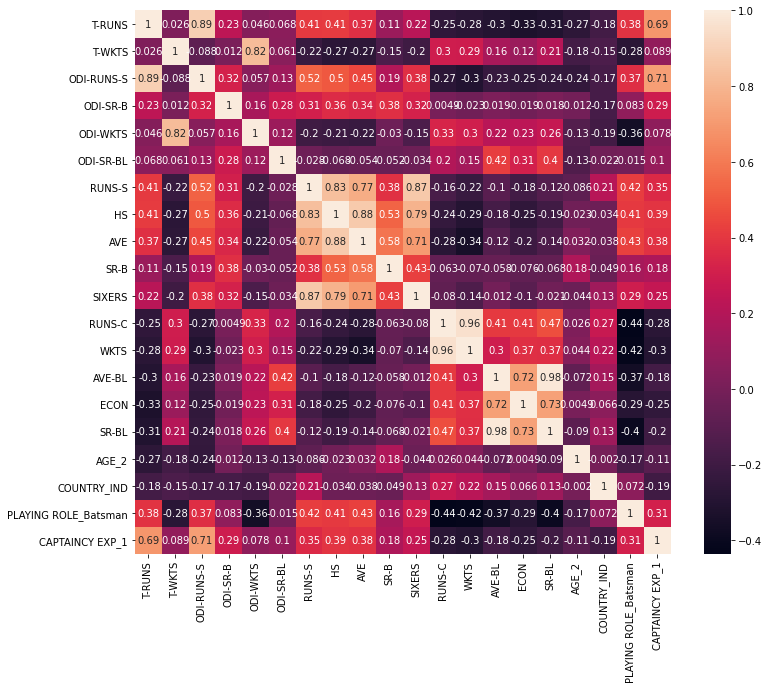

In [66]:
plt.figure( figsize= (12,10))
sn.heatmap(X[columns_with_large_vif].corr() , annot = True)

In [67]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS',
'AVE', 'RUNS-C', 'SR-B', 'AVE-BL',
'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL']

In [68]:
X_new_features = list(set(X_features) - set(columns_to_be_removed))

In [69]:
get_vif_factors(X[X_new_features])

column       VIF
0              COUNTRY_PAK  1.334773
1                 ODI-WKTS  2.742889
2                    AGE_3  1.779861
3              COUNTRY_BAN  1.094293
4     PLAYING ROLE_Batsman  2.680207
5      PLAYING ROLE_Bowler  3.060168
6               COUNTRY_WI  1.194093
7                     WKTS  2.883101
8                   SIXERS  2.397409
9              COUNTRY_IND  3.144668
10               ODI-SR-BL  2.822148
11              COUNTRY_SA  1.416657
12             COUNTRY_ENG  1.131869
13              COUNTRY_SL  1.519752
14              COUNTRY_NZ  1.173418
15         CAPTAINCY EXP_1  2.458745
16             COUNTRY_ZIM  1.205305
17  PLAYING ROLE_W. Keeper  1.900941

In [70]:
X_new_features

['COUNTRY_PAK',
 'ODI-WKTS',
 'AGE_3',
 'COUNTRY_BAN',
 'PLAYING ROLE_Batsman',
 'PLAYING ROLE_Bowler',
 'COUNTRY_WI',
 'WKTS',
 'SIXERS',
 'COUNTRY_IND',
 'ODI-SR-BL',
 'COUNTRY_SA',
 'COUNTRY_ENG',
 'COUNTRY_SL',
 'COUNTRY_NZ',
 'CAPTAINCY EXP_1',
 'COUNTRY_ZIM',
 'PLAYING ROLE_W. Keeper']

In [71]:
train_X = train_X[X_new_features]
ipl_model_2 = sm.OLS(train_y, train_X).fit()

In [72]:
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2021-09-27 14:26   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [73]:
significant_vars = ['COUNTRY_IND','COUNTRY_ENG','SIXERS','CAPTAINCY EXP_1']

In [74]:
train_X = train_X[significant_vars]


In [75]:
ipl_model_3 = sm.OLS(train_y , train_X).fit()

In [76]:
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2021-09-27 14:26 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

# Residual Analysis in Multiple Linear Regression

In [77]:
###Residual plot for Homoscedasticity and model specification

((array([-2.4760249 , -2.14138988, -1.94807389, -1.80823692, -1.69680704,
         -1.60317211, -1.52179612, -1.44940796, -1.38390613, -1.32385649,
         -1.26823449, -1.21628142, -1.16741888, -1.12119525, -1.07725071,
         -1.03529366, -0.99508423, -0.95642252, -0.91914005, -0.88309335,
         -0.84815914, -0.81423059, -0.78121445, -0.74902873, -0.7176009 ,
         -0.68686641, -0.6567675 , -0.62725219, -0.59827351, -0.56978878,
         -0.54175909, -0.51414876, -0.48692497, -0.46005741, -0.43351795,
         -0.40728042, -0.38132035, -0.35561479, -0.33014212, -0.30488191,
         -0.27981479, -0.25492229, -0.23018679, -0.20559134, -0.18111966,
         -0.15675598, -0.13248501, -0.10829184, -0.08416191, -0.06008088,
         -0.03603465, -0.01200924,  0.01200924,  0.03603465,  0.06008088,
          0.08416191,  0.10829184,  0.13248501,  0.15675598,  0.18111966,
          0.20559134,  0.23018679,  0.25492229,  0.27981479,  0.30488191,
          0.33014212,  0.35561479,  0.

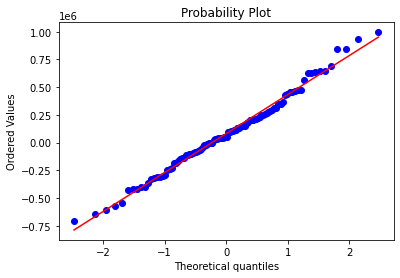

In [78]:
scipy.stats.probplot(ipl_model_3.resid, dist="norm", plot=plt)

##Residual plot for Homoscedasticity and model specification

In [79]:
def get_standardized_values( vals):
    return ( vals - vals.mean())/vals.std()

In [80]:
def plot_resid_fitted( fitted , resid , title):
    plt.scatter( get_standardized_values(fitted) , get_standardized_values(resid))
    plt.title(title)
    plt.xlabel('Standardized predicted values')
    plt.ylabel('Standardized residual values')
    plt.show()

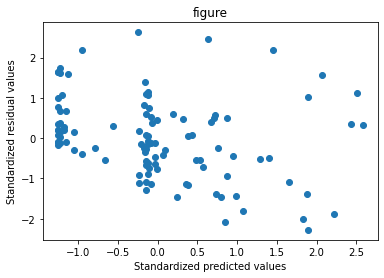

In [81]:
plot_resid_fitted(ipl_model_3.fittedvalues, ipl_model_3.resid , 'figure')

# Detecting influencers

In [82]:
k = train_X.shape[1]
n = train_X.shape[0]

In [83]:
print('No. of variables' , k )

No. of variables 4


In [84]:
print('No of observations',n)

No of observations 104


In [85]:
leverage_cutoff = 3*((k + 1)/n)

In [86]:
print("Cutoff for leverage values :", round(leverage_cutoff ,3))

Cutoff for leverage values : 0.144


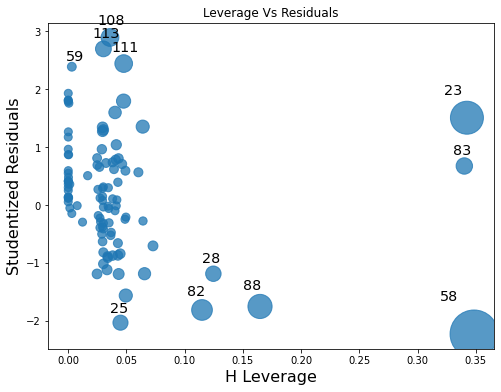

In [87]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax = plt.subplots(figsize = (8,6))
influence_plot(ipl_model_3, ax = ax)
plt.title('Leverage Vs Residuals')
plt.show()

In [88]:
ipl_auction_df[ipl_auction_df.index.isin([23,58,83])]

Sl.NO.      PLAYER NAME  AGE COUNTRY  TEAM PLAYING ROLE  T-RUNS  T-WKTS  \
23      24      Flintoff, A    2     ENG   CSK   Allrounder    3845     226   
58      59  Mascarenhas, AD    2     ENG   RR+   Allrounder       0       0   
83      84    Pietersen, KP    2     ENG  RCB+      Batsman    6654       5   

    ODI-RUNS-S  ODI-SR-B  ...    SR-B  SIXERS  RUNS-C  WKTS  AVE-BL  ECON  \
23        3394     88.82  ...  116.98       2     105     2   52.50  9.55   
58         245     95.33  ...  101.37       1     331    19   17.42  7.01   
83        4184     86.76  ...  141.20      30     215     7   30.71  7.41   

    SR-BL  AUCTION YEAR  BASE PRICE  SOLD PRICE  
23  33.00          2009      950000     1550000  
58  14.95          2011      100000      100000  
83  24.86          2009     1350000     1550000  

[3 rows x 26 columns]

# transforming response variable

In [ ]:
'''
transformation in MLR is used to address the following issues
1. poor fit ( low r-squared error)
2. residuals do not follow a normal distribution
3. residuals are not homoscedastic
4. found that that there is non linear relationship between independent and dependent variables
'''

In [89]:
import numpy as np
train_y = np.sqrt(train_y)
train_y

70     806.225775
78     308.220700
47     724.568837
0      223.606798
12     632.455532
          ...    
71     894.427191
106    570.087713
14     547.722558
92     474.341649
102    316.227766
Name: SOLD PRICE, Length: 104, dtype: float64

In [90]:
ipl_model_4 = sm.OLS(train_y,train_X).fit()
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2021-09-27 14:26 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================

"""

((array([-2.4760249 , -2.14138988, -1.94807389, -1.80823692, -1.69680704,
         -1.60317211, -1.52179612, -1.44940796, -1.38390613, -1.32385649,
         -1.26823449, -1.21628142, -1.16741888, -1.12119525, -1.07725071,
         -1.03529366, -0.99508423, -0.95642252, -0.91914005, -0.88309335,
         -0.84815914, -0.81423059, -0.78121445, -0.74902873, -0.7176009 ,
         -0.68686641, -0.6567675 , -0.62725219, -0.59827351, -0.56978878,
         -0.54175909, -0.51414876, -0.48692497, -0.46005741, -0.43351795,
         -0.40728042, -0.38132035, -0.35561479, -0.33014212, -0.30488191,
         -0.27981479, -0.25492229, -0.23018679, -0.20559134, -0.18111966,
         -0.15675598, -0.13248501, -0.10829184, -0.08416191, -0.06008088,
         -0.03603465, -0.01200924,  0.01200924,  0.03603465,  0.06008088,
          0.08416191,  0.10829184,  0.13248501,  0.15675598,  0.18111966,
          0.20559134,  0.23018679,  0.25492229,  0.27981479,  0.30488191,
          0.33014212,  0.35561479,  0.

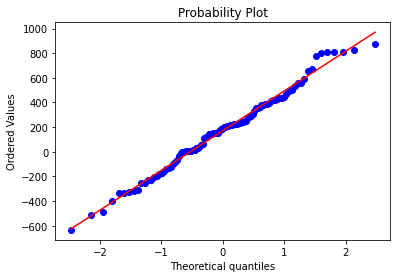

In [91]:
#draw_pp_plot(ipl_model_4, ' figure Normal PP plot')
scipy.stats.probplot(ipl_model_4.resid, dist="norm", plot=plt)

# Making predictions on the validation set

In [114]:

ipl_model_4.predict(test_X[train_X.columns])



55       51.202584
40      516.310183
19      298.681739
31       25.601292
115      42.668820
56       76.803876
69        0.000000
105     490.708891
81      780.856866
26     1518.613099
95      499.242655
27      682.304230
64      516.310183
4       729.654282
97     1190.477536
100       8.533764
36       93.871404
80      601.647822
93     1582.633791
84      486.027659
18     1104.743009
10      324.283031
120     434.825075
11      417.757547
126     417.757547
45       68.270112
dtype: float64

# Measuring RMSE

In [94]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

496151.18122558173

# measuring R-squared value

In [95]:
np.round(metrics.r2_score(pred_y, test_y),2)

## How much accurate our model is

0.44